### Instructions

---

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lessons:

 1. Multiple linear regression - Introduction
 2. Multicollinearity



---

#### Getting Started:

1. Click on this link to open the Colab file for this project.

  https://colab.research.google.com/drive/1GKgwblmYqlr4ymCDBIdL66kf72nj-7XT

2. Create a duplicate copy of the Colab file as described below.

  - Click on the **File menu**. A new drop-down list will appear.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/0_file_menu.png' width=500>

  - Click on the **Save a copy in Drive** option. A duplicate copy will get created. It will open up in the new tab on your web browser.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/1_create_colab_duplicate_copy.png' width=500>

3. After creating the duplicate copy of the notebook, please rename it in the **YYYY-MM-DD_StudentName_Project65** format.

4. Now, write your code in the prescribed code cells.


---

### Problem Statement

Implement multiple linear regression to create a predictive model capable of predicting the profits earned by startup companies. The dataset contains data about 50 startups and the amount of money they spend on research and development, administration and marketing. Also, find out if there is multicollinearity in the dataset.






---

### List of Activities

**Activity 1:** Analysing the Dataset

**Activity 2:** Data Manipulation

**Activity 3:** Train-Test Split

**Activity 4:** Model Training and Prediction using `sklearn`

**Activity 5:** Model Training using `statsmodels.api`



---


#### Activity 1:  Analysing the Dataset

- Create a Pandas DataFrame for **Startups** dataset using the below link. This dataset contains profits earned by 50 startups and their several expenditure values.



   **Dataset Link:** https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/50_Startups.csv

- Print the first five rows of the dataset. Check for null values and treat them accordingly.

In [ ]:
# Import modules
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
# Dataset Link: 'https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/50_Startups.csv'
data_df = pd.read_csv("https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/50_Startups.csv")
# Print first five rows using head() function
data_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
# Check if there are any null values. If any column has null values, treat them accordingly
data_df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

---

#### Activity 2: Data Manipulation

The dataset contains a column `State` that is categorical. However for linear regression, we need all numerical variables. So to convert the categorical data to a numerical data,
- Use `unique()` function to get the unique categories of the `State` column.
- Replace the unique categories with intergers starting from `0`, `1`, `2`,...


In [ ]:
# Display the number of occurrences of each label in the 'State' column.
data_df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [ ]:
# Create a list of unique categories using 'unique()' function and print them
unique_state = list(data_df['State'].unique())
unique_state

['New York', 'California', 'Florida']

In [ ]:
# Replace the unique non-numeric categories in 'State' column with numeric values
data_df.loc[data_df['State'] == unique_state[0],'State'] = 0
data_df.loc[data_df['State'] == unique_state[1],'State'] = 1
data_df.loc[data_df['State'] == unique_state[2],'State'] = 2

In [ ]:
# Display the number of occurrences of each label in the 'State' column again.
print(data_df['State'].value_counts())
# Print the datatype of the column
print('--'*20)
print(type(data_df['State']))
print(data_df['State'].dtype)

0    17
1    17
2    16
Name: State, dtype: int64
----------------------------------------
<class 'pandas.core.series.Series'>
object


In [ ]:
# Convert the column into integer DataFrame.
data_df['State'] = data_df["State"].astype('int')

In [ ]:
# Print the information of the DataFrame to verify the column's datatype
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     int64  
 4   Profit           50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


---

#### Activity 3: Train-Test Split

We need to predict the value of `Profit` variable, using other variables. Thus, `Profit` is the target or dependent variable and other columns except `Profit` are the features or the independent variables.

Split the dataset into training set and test set such that the training set contains 70% of the instances and the remaining instances will become the test set.

In [ ]:
# Split the DataFrame into the training and test sets.
features = list(data_df.columns.values[1:])
X = data_df[features]
y = data_df['Profit']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.33 ,random_state = 42)
y_train_reshape = y_train.values.reshape(-1,1)
y_test_reshape = y_test.values.reshape(-1,1)

---

#### Activity 4: Model Training and Prediction using `sklearn`

Implement multiple linear regression using `sklearn` module by creating an object of the `LinearRegression` class and calling the `fit()` function.

**Note:** Reshaping the target variable array into a 2D array is not mandatory in multiple linear regression. You can skip that.

In [ ]:
# Build linear regression model using sklearn module
sk_lr = LinearRegression()
sk_lr.fit(X_train,y_train_reshape)
# Print the value of the intercept
print(sk_lr.intercept_[0])

# Print the names of the features along with the values of their corresponding coefficients.
for i in list(zip(X.columns.values,sk_lr.coef_[0])):
    print(i[0],i[1])

8.731149137020111e-11
Administration 1.0632282065854723e-16
Marketing Spend -3.0531133177191805e-16
State -1.4922063610611384e-12
Profit 0.9999999999999998


Predict the values for the test set by calling the `predict()` function on the LinearRegression object.

In [ ]:
# Predict the target variable values for test set
y_test_pred = sk_lr.predict(X_test)
y_test_pred

array([[134307.35],
       [ 81005.76],
       [ 99937.59],
       [ 64926.08],
       [125370.37],
       [ 35673.41],
       [105733.54],
       [107404.34],
       [ 97427.84],
       [122776.86],
       [141585.52],
       [166187.94],
       [ 89949.14],
       [152211.77],
       [182901.99],
       [156122.51],
       [ 77798.83]])

---

#### Activity 5: Model Training using `statsmodels.api`

Perform the following tasks:
- Implement multiple linear regression using `statsmodels.api` module and find the values of all the regression coefficients using this module.
-Print the statistical summary of the regression model.
- If the summary indicates the presence of multicollinearity, create a heatmap of a correlation DataFrame to identify which independent variables are highly correlated with each other.

In [ ]:
# Build a linear regression model using the 'statsmodels.api' module.
import statsmodels.api as sm

X = data_df[features]
y = data_df['Profit']
# Add a constant to feature variables
X_train_sm = sm.add_constant(X_train)

# Fit the regression line using 'OLS'
sm_linear = sm.OLS(y_train,X_train).fit()
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
sm_linear.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Administration     8.711298e-16
Marketing Spend   -2.056577e-16
State             -1.347617e-11
Profit             1.000000e+00
dtype: float64

In [ ]:
# Print statistical summary of the model
print(sm_linear.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Profit   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.351e+31
Date:                Tue, 15 Feb 2022   Prob (F-statistic):                        0.00
Time:                        17:04:03   Log-Likelihood:                          737.08
No. Observations:                  33   AIC:                                     -1466.
Df Residuals:                      29   BIC:                                     -1460.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

**Q:** What is the $R^2$ (R-squared) value for this model?

**A:** 1

**Q:** Does the summary table indicates the presence of multicollinearity?

**A:** Yes, this summmary table strongly indicates the presence of multicollinaerity.

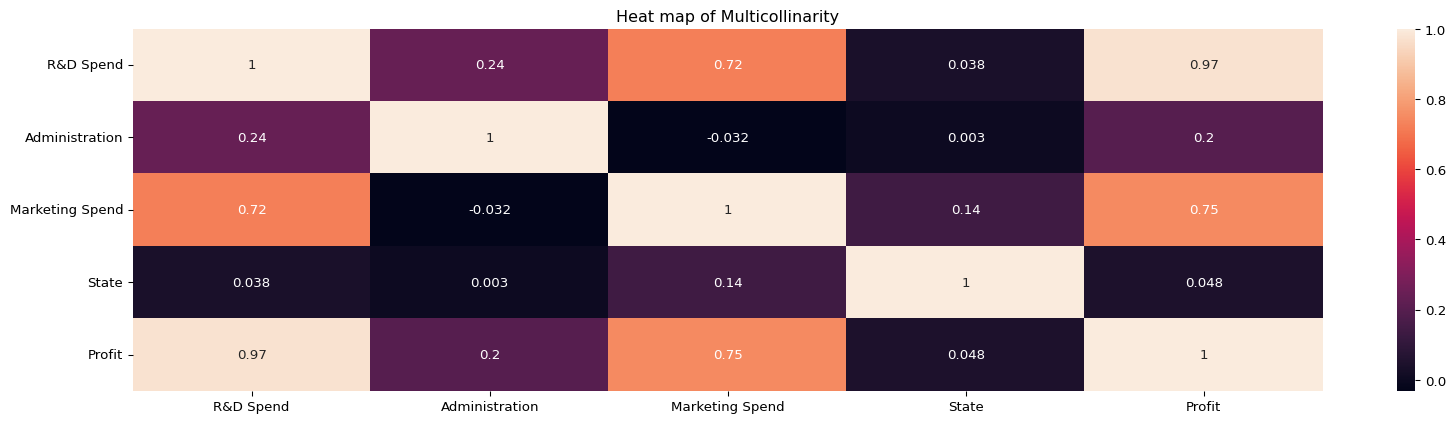

In [ ]:
# If there is multicollinearity, create a heatmap of a correlation DataFrame of the Startup dataset.
# If no, skip this part
plt.figure(figsize = (20,5),dpi = 96)
plt.title("Heat map of Multicollinarity")
sns.heatmap(data_df.corr(),annot = True)
plt.show()

**Q:** Which independent variables are strongly correlated with each other?

**A:**  Marketing and Adminstration are strongly correlated with each other.

---

### Submitting the Project:

1. After finishing the project, click on the **Share** button on the top right corner of the notebook. A new dialog box will appear.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/2_share_button.png' width=500>

2. In the dialog box, make sure that '**Anyone on the Internet with this link can view**' option is selected and then click on the **Copy link** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/3_copy_link.png' width=500>

3. The link of the duplicate copy (named as **YYYY-MM-DD_StudentName_Project65**) of the notebook will get copied

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/4_copy_link_confirmation.png' width=500>

4. Go to your dashboard and click on the **My Projects** option.
   
   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/5_student_dashboard.png' width=800>

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/6_my_projects.png' width=800>

5. Click on the **View Project** button for the project you want to submit.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/7_view_project.png' width=800>

6. Click on the **Submit Project Here** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/8_submit_project.png' width=800>

7. Paste the link to the project file named as **YYYY-MM-DD_StudentName_Project65** in the URL box and then click on the **Submit** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/9_enter_project_url.png' width=800>

---